In [29]:
#from sklearn.svm import OneClassSVM
#from sklearn import preprocessing
# ---> https://www.kaggle.com/mahdishirmohammadi/heart-disease-binary-classification

# Data science and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
# dataset => https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset
print("Data Shape:", df.shape)

Data Shape: (253680, 22)


In [31]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
HeartDiseaseorAttack    253680 non-null float64
HighBP                  253680 non-null float64
HighChol                253680 non-null float64
CholCheck               253680 non-null float64
BMI                     253680 non-null float64
Smoker                  253680 non-null float64
Stroke                  253680 non-null float64
Diabetes                253680 non-null float64
PhysActivity            253680 non-null float64
Fruits                  253680 non-null float64
Veggies                 253680 non-null float64
HvyAlcoholConsump       253680 non-null float64
AnyHealthcare           253680 non-null float64
NoDocbcCost             253680 non-null float64
GenHlth                 253680 non-null float64
MentHlth                253680 non-null float64
PhysHlth                253680 non-null float64
DiffWalk                253680 non-null float64
Sex                     2

## Feature Information
- HeartDiseaseorAttack : 0/1 심장병여부
- HighBP : 0/1
- HighChol : 0/1
- CholCheck : 0/1
- BMI 
- Smoker : 0/1 
- Stroke : 0/1
- Diabetes : 0/1
- PhysActivity : 0/1
- Fruits
- Veggies
- HvyAlcoholConsump
- AnyHealthcare
- NoDocbcCost
- GenHlth
- MentHlth
- PhysHlth 
- DiffWalk
- Sex
- Age
- Education
- Income

In [33]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 01. 데이터 파악하기

In [34]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [35]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [36]:
# 심장병 여부 ==> 'HeartDiseaseorAttack' 컬럼
print("Values are: ", df.HeartDiseaseorAttack.unique())
print("Value Counts: ")
print(df.HeartDiseaseorAttack.value_counts())

Values are:  [0. 1.]
Value Counts: 
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


In [37]:
# 심장병 여부(y/n)별 비중
df.HeartDiseaseorAttack.value_counts() / len(df)*100

0.0    90.581441
1.0     9.418559
Name: HeartDiseaseorAttack, dtype: float64

In [38]:
# pearson 상관관계 
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


(22.5, 0.0)

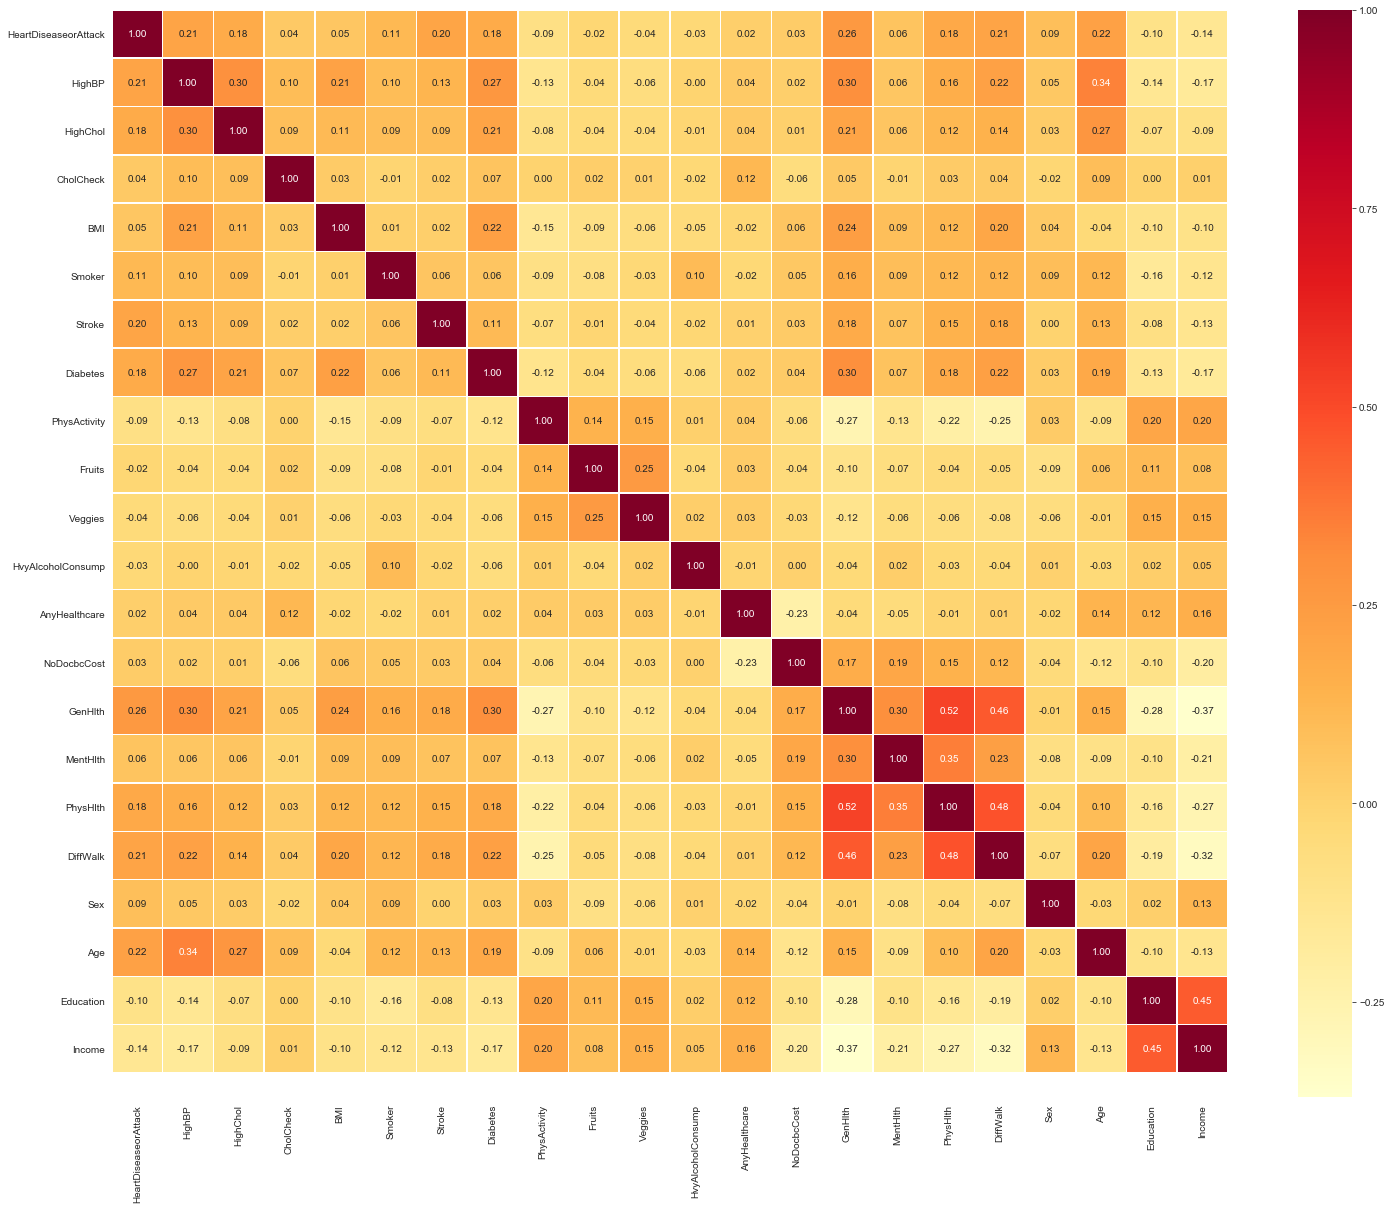

In [39]:
# 시각화 관련 source =>  https://dsbook.tistory.com/52?category=780539
# heatmap color guide => https://matplotlib.org/stable/tutorials/colors/colormaps.html
# heatmap 관련 documentation => https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='YlOrRd')  # heatmap color
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

## 02. 데이터 전처리 : 이상치 확인 및 처리

In [40]:
l = df.columns.values
len(l)

22

### Boxplot

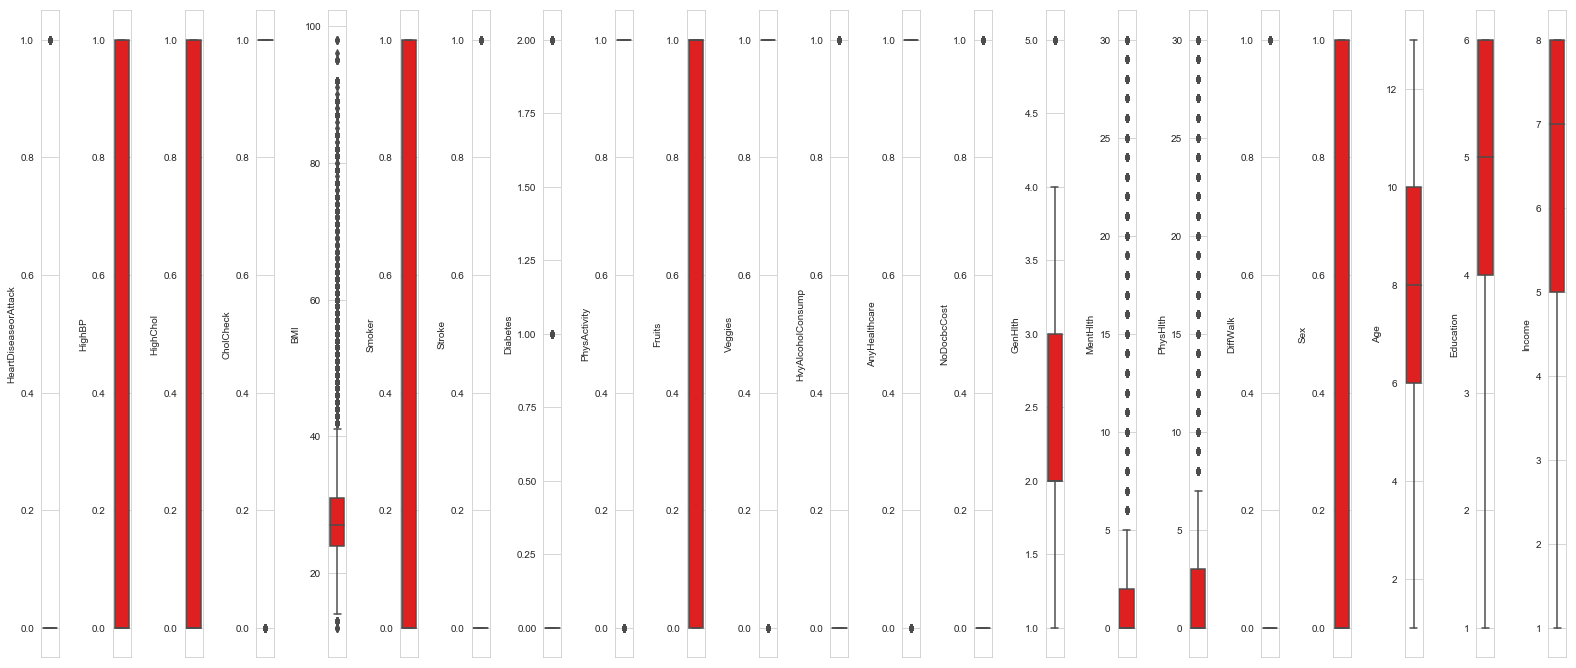

In [41]:
l = df.columns.values
number_of_columns=22
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,18*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows *2,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='red')
    plt.tight_layout()

- columns with no outliers  =>  HighBP, HighChol, Smoker, Fruits, Sex
- columns with outliers => rest of the columns

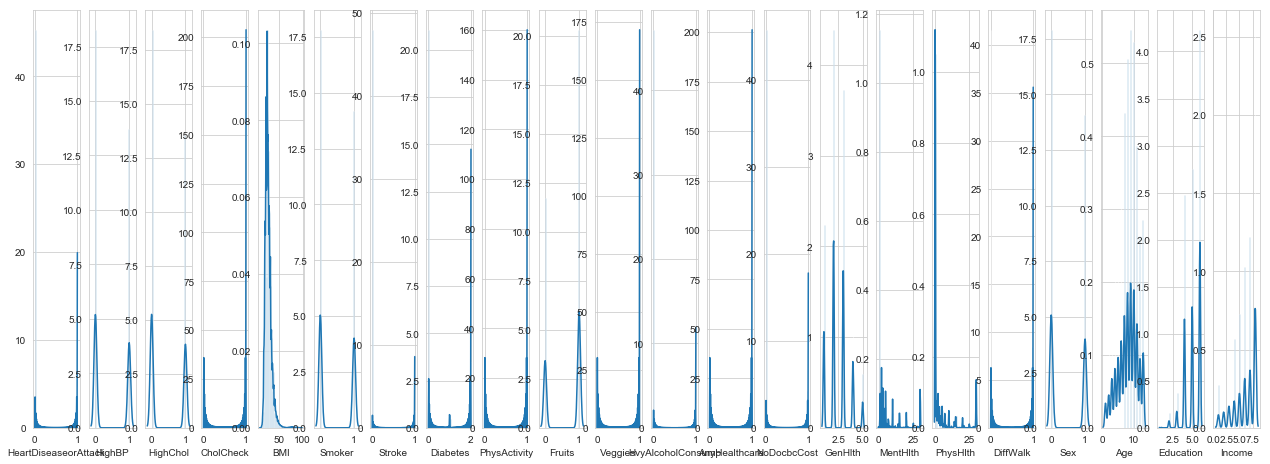

In [22]:
plt.figure(figsize=(number_of_columns,18*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows *2,number_of_columns*2,i+1)
    sns.distplot(df[l[i]],kde=True) 

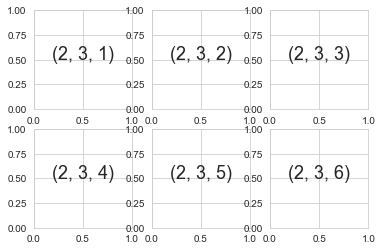

In [42]:
# subplot() 사용시 참고사항
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

### Histogram

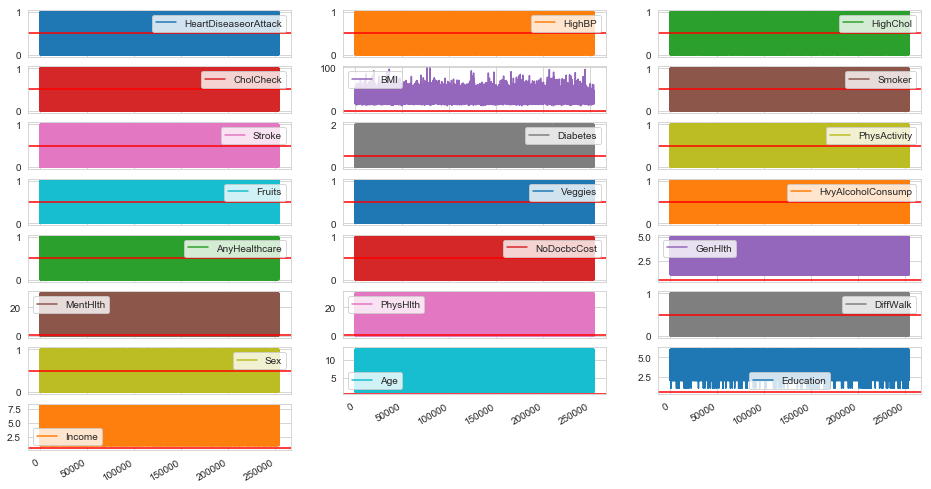

In [26]:
axes = df.plot(subplots=True, layout=(8, 3), figsize=(16,9))

for c in axes:
    for ax in c:
        ax.axhline(y=0.5, color='r')
